# Description 

Select an image, select a crop region and the program will create a TIFF file of your image cropped.

# Imports 

In [9]:
import custom_style
custom_style.style()

In [10]:
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import matplotlib.patches as patches
%matplotlib notebook

from ipywidgets.widgets import interact
from ipywidgets import widgets

import file_handler
import gui_widgets

In [11]:
%gui qt

# Import Image

Select the image your want to crop

In [12]:
data_file = gui_widgets.gui_fimage()[0]
data = np.array(file_handler.load_data(data_file))
[height, width] = np.shape(data)

# Crop Image

## Select Cropping Region 

<IPython.core.display.Javascript object>


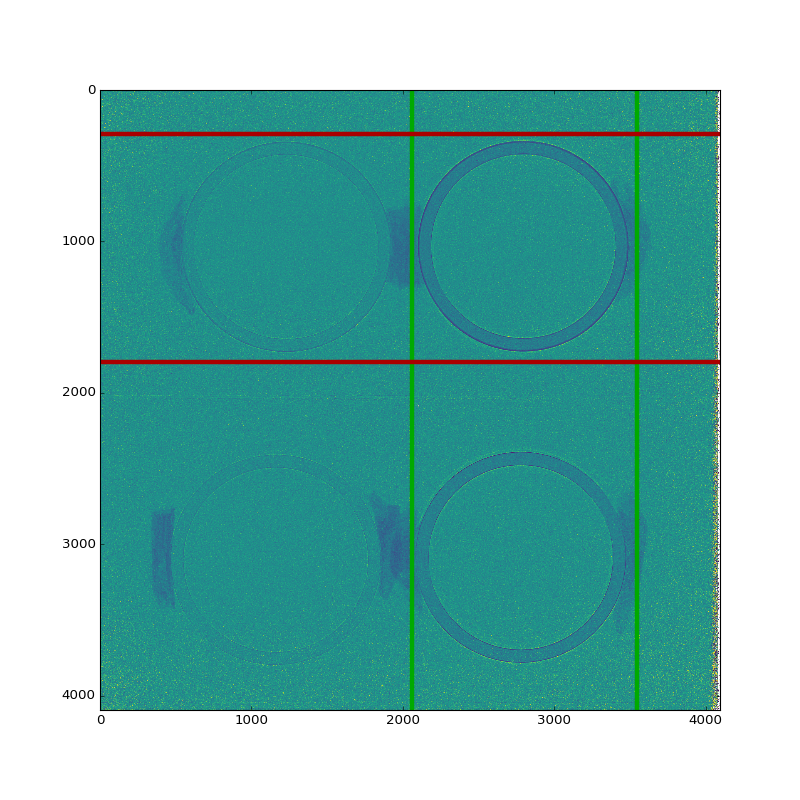

[2060, 3550, 287, 1794]

In [13]:
min_value = 0
max_value = 32555


def plot_image_with_crop_region(x_left, x_right, y_top, y_bottom):

    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis', vmin=0, vmax=2)
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)
    
    return [x_left, x_right, y_top, y_bottom]


crop = interact(
    plot_image_with_crop_region,
    x_left=widgets.IntSlider(
        min=0, max=width - 1, step=1, value=2060),
    x_right=widgets.IntSlider(
        min=0, max=width - 1, step=1, value=3550),
    y_top=widgets.IntSlider(
        min=0, max=height - 1, step=1, value=287),
    y_bottom=widgets.IntSlider(
        min=0, max=height - 1, step=1, value=1794))

## Check Cropped Image

Region Selected:
  left : 2060
  right: 3550
    top: 287
 bottom: 1794
(1507, 1490)


<IPython.core.display.Javascript object>


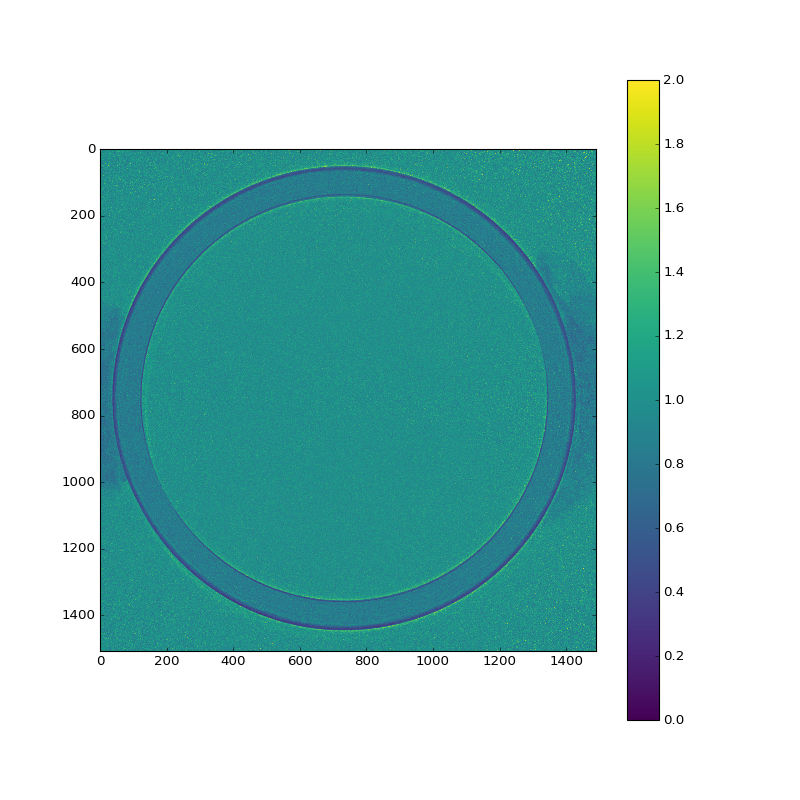

In [14]:
[x_left, x_right, y_top, y_bottom] = crop.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

data_cropped = data[y_top: y_bottom, x_left: x_right]
print(data_cropped.shape)

#test
plt.figure(figsize=(10,10))
plt.imshow(data_cropped, cmap='viridis', vmin=0, vmax=2)
plt.colorbar()



# Export Cropped Image

In [15]:
output_file_name = gui_widgets.gui_output_fimage()

new_image = np.float32(data_cropped)
file_handler.make_tiff(data = new_image, filename = output_file_name)